First 5 rows:
    purchase_amount  review_score  days_to_delivery returned
0       687.011818      3.778615                 4       no
1       325.972093      2.458683                 1      yes
2       685.382724      3.954024                 7       no
3       291.100577      3.666468                14      yes
4       209.806672      1.478248                 2       no

Detected Classification Task

Missing Values:
 purchase_amount     0
review_score        0
days_to_delivery    0
returned            0
dtype: int64

Descriptive Statistics:
        purchase_amount  review_score  days_to_delivery    returned
count       100.000000    100.000000        100.000000  100.000000
mean        573.396104      3.065745          7.830000    0.590000
std         267.802559      1.160948          4.119564    0.494311
min         112.270622      1.000746          1.000000    0.000000
25%         351.637815      2.124633          4.000000    0.000000
50%         598.360894      3.097644          7.

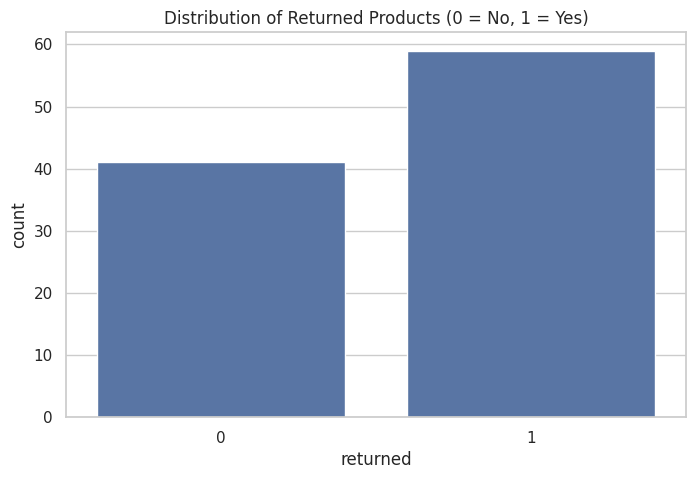

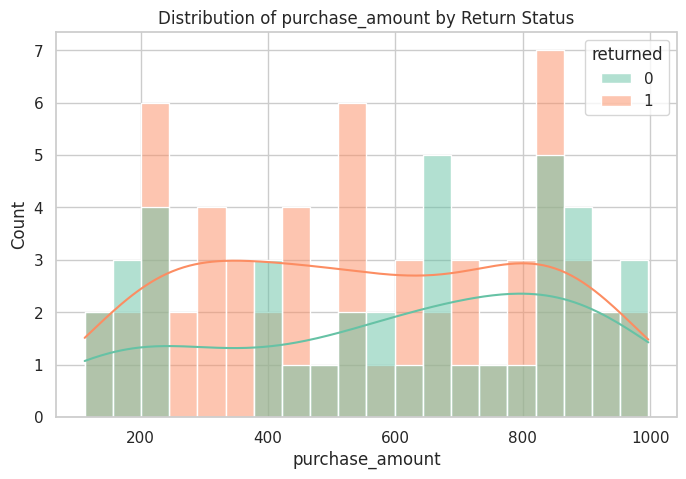

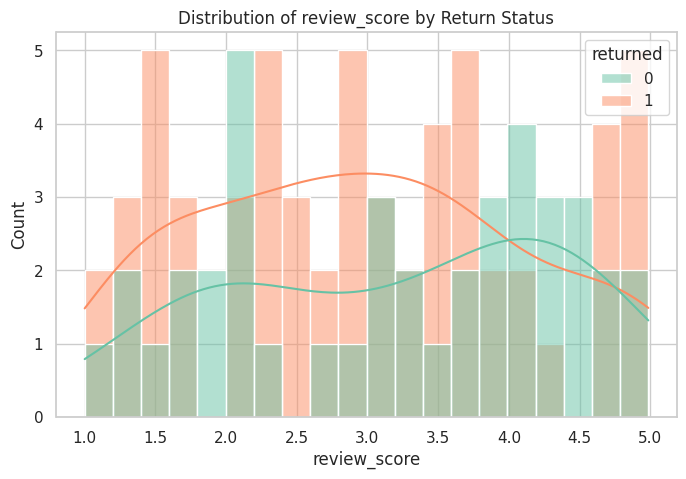

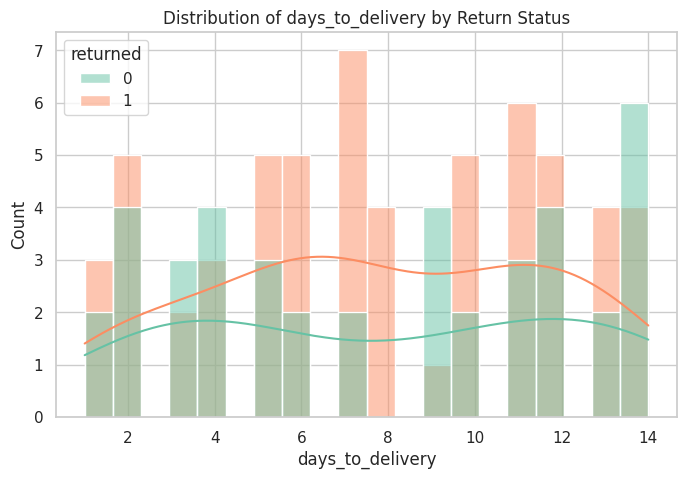

<ipython-input-9-71dfa0ef0f1d>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='returned', y=col, palette='Set3')


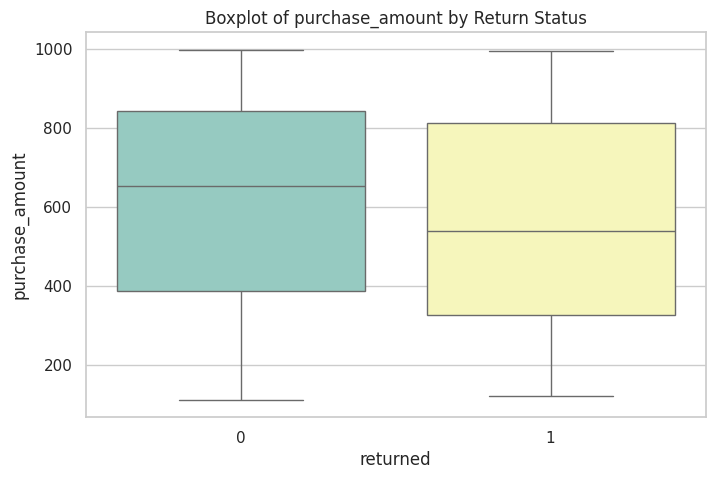

<ipython-input-9-71dfa0ef0f1d>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='returned', y=col, palette='Set3')


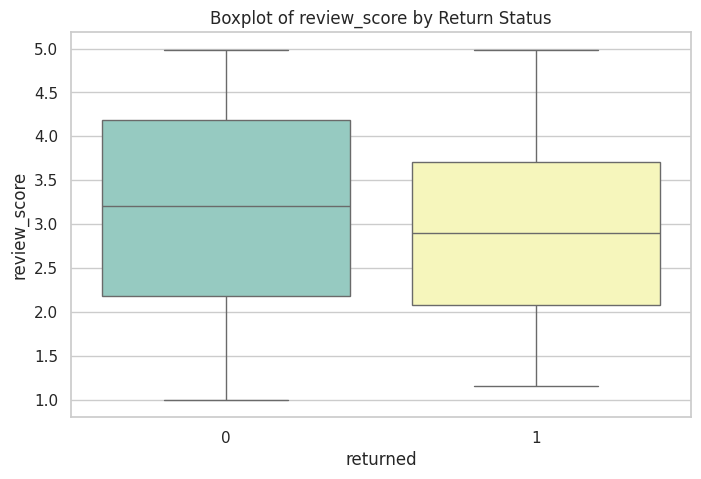

<ipython-input-9-71dfa0ef0f1d>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='returned', y=col, palette='Set3')


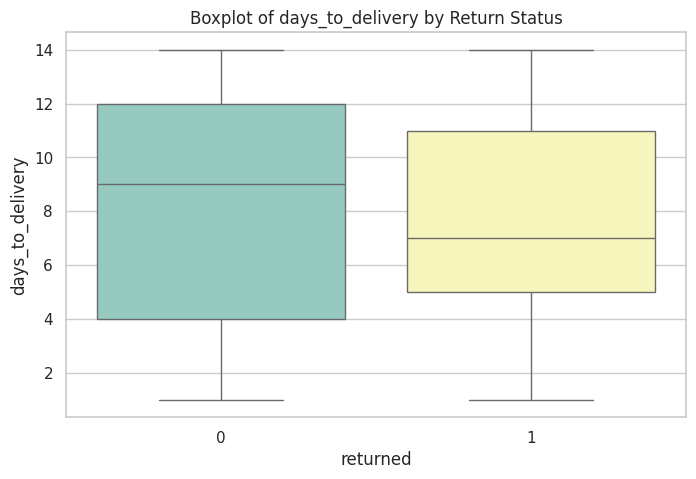

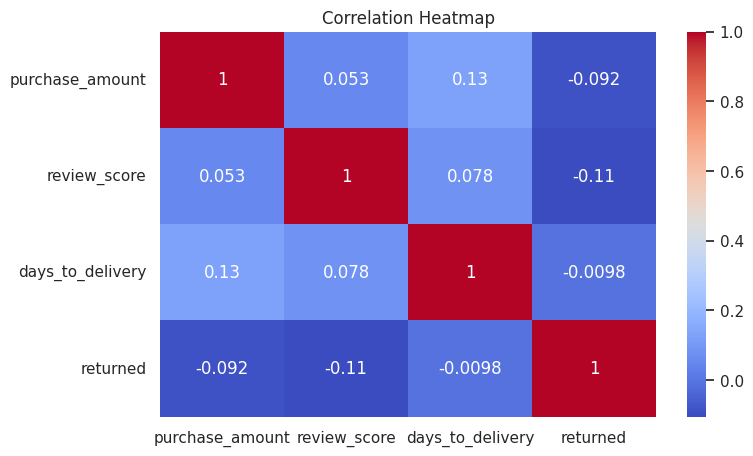

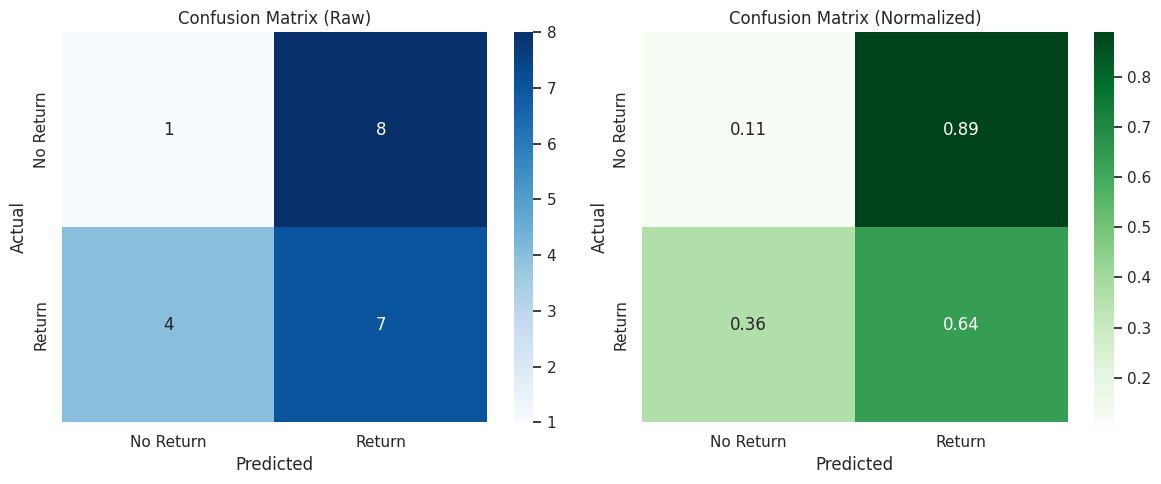


Accuracy:  0.40
Precision: 0.47
Recall:    0.64

Classification Report:
               precision    recall  f1-score   support

   No Return       0.20      0.11      0.14         9
      Return       0.47      0.64      0.54        11

    accuracy                           0.40        20
   macro avg       0.33      0.37      0.34        20
weighted avg       0.35      0.40      0.36        20



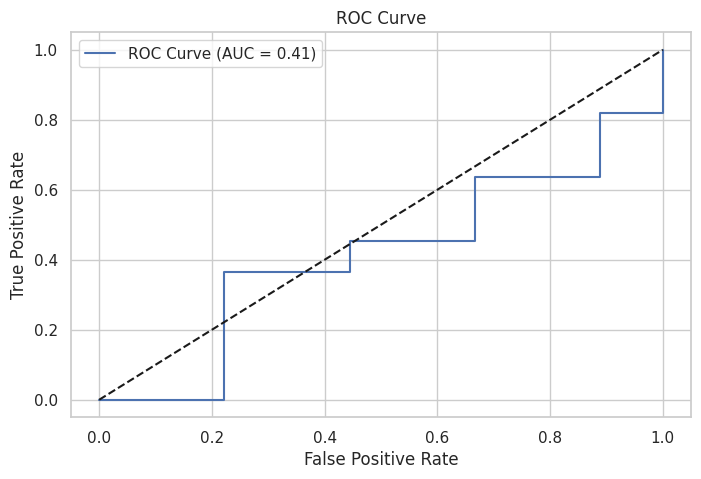

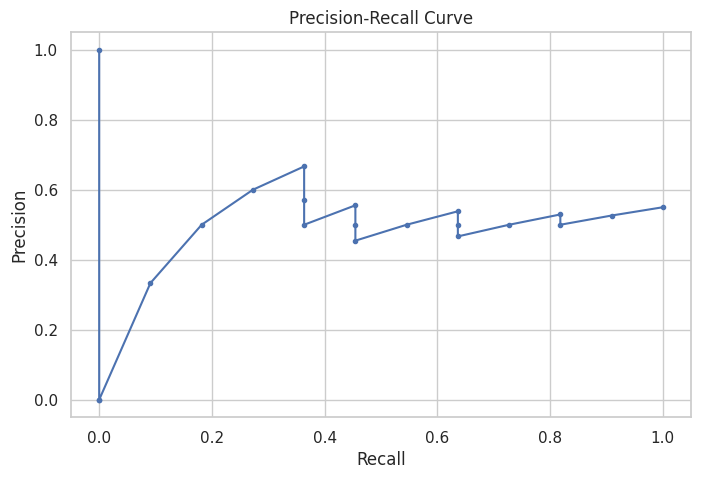

<ipython-input-9-71dfa0ef0f1d>:136: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_df, x='Importance', y='Feature', palette='viridis')


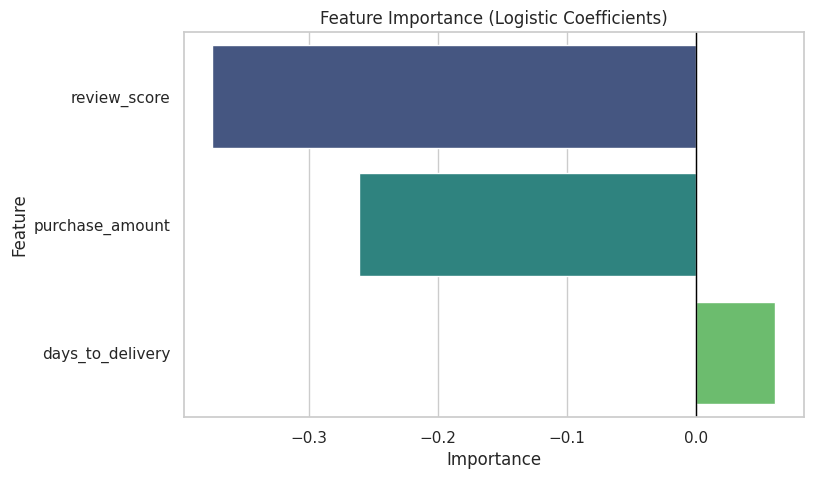

In [9]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    precision_score, recall_score, roc_curve, auc, precision_recall_curve
)
from sklearn.cluster import KMeans

# Set aesthetics
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (8, 5)

# Load Dataset
df = pd.read_csv('product_return.csv')
print("First 5 rows:\n", df.head())

# Detect task type: classification or clustering
task_type = 'classification' if 'returned' in df.columns else 'clustering'

if task_type == 'classification':
    print("\nDetected Classification Task")

    # Check for missing values
    print("\nMissing Values:\n", df.isnull().sum())

    # Encode target
    df['returned'] = LabelEncoder().fit_transform(df['returned'])  # yes=1, no=0

    # Summary statistics
    print("\nDescriptive Statistics:\n", df.describe())

    # Target Distribution
    sns.countplot(data=df, x='returned')
    plt.title("Distribution of Returned Products (0 = No, 1 = Yes)")
    plt.show()

    # Histograms
    for col in ['purchase_amount', 'review_score', 'days_to_delivery']:
        sns.histplot(data=df, x=col, hue='returned', kde=True, bins=20, palette='Set2')
        plt.title(f'Distribution of {col} by Return Status')
        plt.show()

    # Boxplots
    for col in ['purchase_amount', 'review_score', 'days_to_delivery']:
        sns.boxplot(data=df, x='returned', y=col, palette='Set3')
        plt.title(f'Boxplot of {col} by Return Status')
        plt.show()

    # Correlation Heatmap
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
    plt.title("Correlation Heatmap")
    plt.show()

    # Prepare Data
    X = df.drop('returned', axis=1)
    y = df['returned']

    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Feature Scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train Model
    model = LogisticRegression()
    model.fit(X_train_scaled, y_train)

    # Predictions and Probabilities
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    cm_normalized = confusion_matrix(y_test, y_pred, normalize='true')

    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax[0],
                xticklabels=['No Return', 'Return'],
                yticklabels=['No Return', 'Return'])
    ax[0].set_title('Confusion Matrix (Raw)')
    ax[0].set_xlabel('Predicted')
    ax[0].set_ylabel('Actual')

    sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Greens', ax=ax[1],
                xticklabels=['No Return', 'Return'],
                yticklabels=['No Return', 'Return'])
    ax[1].set_title('Confusion Matrix (Normalized)')
    ax[1].set_xlabel('Predicted')
    ax[1].set_ylabel('Actual')

    plt.tight_layout()
    plt.show()

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    print(f"\nAccuracy:  {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall:    {recall:.2f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['No Return', 'Return']))

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Precision-Recall Curve
    precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_proba)
    plt.plot(recall_vals, precision_vals, marker='.')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.grid(True)
    plt.show()

    # Feature Importance
    coef = model.coef_[0]
    feature_df = pd.DataFrame({'Feature': X.columns, 'Importance': coef})
    feature_df = feature_df.sort_values(by='Importance', key=abs, ascending=False)
    sns.barplot(data=feature_df, x='Importance', y='Feature', palette='viridis')
    plt.title('Feature Importance (Logistic Coefficients)')
    plt.axvline(0, color='black', lw=1)
    plt.show()

else:
    print("\nDetected Clustering Task")

    # Choose numeric features
    X = df.select_dtypes(include='number')

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # KMeans Clustering
    kmeans = KMeans(n_clusters=3, random_state=42)
    df['Cluster'] = kmeans.fit_predict(X_scaled)

    # Visualize Clusters
    sns.pairplot(df, hue='Cluster', palette='tab10')
    plt.suptitle('KMeans Clusters Visualization', y=1.02)
    plt.show()

    # Cluster Centers
    centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X.columns)
    print("\nCluster Centers:\n", centers)
